In [1]:
import keras
import numpy as np
from keras import datasets
from numpy.linalg import eig 
import matplotlib.pyplot as plt
from numpy import cov
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28*28)
mean = np.mean(x_train, axis=0)
centered = x_train - mean

cov_mat = cov(centered.T)
eig_val, eig_vec = eig(cov_mat)

In [3]:
# creating the eig val pairs
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [4]:
eig_val_sorted = np.array([x[0] for x in eig_pairs])
eig_vec_sorted = np.array([x[1] for x in eig_pairs]).T

In [5]:
eig_vec_sorted.shape

(784, 784)

In [7]:
dimensions = [40, 80, 200]
neigh = KNeighborsClassifier(n_neighbors=3)
x_test_cleaned = x_test.reshape((10000, 28*28))
centered = x_train - mean
centered_test = x_test_cleaned - mean
for dim in dimensions:
    reduced = centered.dot(eig_vec_sorted[:,:dim])
    neigh.fit(reduced, y_train)
    x_test_proj = centered_test.dot(eig_vec[:, :dim])
    pred = neigh.predict(x_test_proj)
    print(accuracy_score(y_test, pred))

0.9745
0.9738
0.9709


In [8]:
# get 95% variance
total = sum(eig_val_sorted)
variance = 0
num_of_comp = 0
while variance < 0.95 * total:
    num_of_comp += 1 
    variance = sum(eig_val_sorted[:num_of_comp])
    

In [53]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=40, whiten=False)

In [77]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [78]:
r = pca.transform(x_train)

In [57]:
neigh.fit(r, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [59]:
y = pca.transform(x_test_cleaned)

In [61]:
pred = neigh.predict(y)
print(accuracy_score(y_test, pred))

0.9744


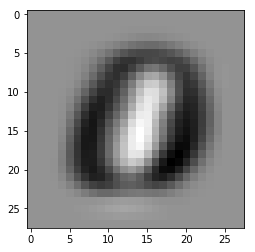

In [28]:
plt.imshow(eig_vec_sorted[:,0].reshape((28, 28)), cmap=plt.cm.gray)

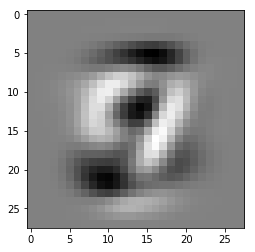

In [29]:
plt.imshow(eig_vec_sorted[:,1].reshape((28, 28)), cmap=plt.cm.gray)

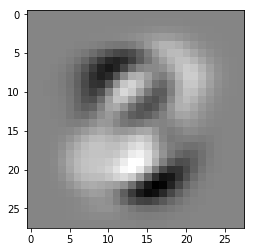

In [31]:
plt.imshow(eig_vec_sorted[:,2].reshape((28, 28)), cmap=plt.cm.gray)

In [81]:
diff = r - centered.dot(eig_vec_sorted[:,:40])

In [93]:
c = centered.dot(eig_vec_sorted[:,:40])

In [94]:
r[0][0]

123.9325886586012

In [99]:
r[0].shape

(40,)

In [83]:
r[0]

array([ 123.93258866, -312.67426203,  -24.51405176, -555.75795793,
        -27.29666828, -232.47628444,  233.99573418,  159.7994958 ,
       -363.51502416,  198.42806948,  197.49700076, -254.05589204,
       -113.49637007,  749.30228021,  219.25964285,   -4.69279988,
        330.15253716,  309.15565553,  277.59424265,  166.33556904,
         27.54612103,  -64.34866501, -217.16031828,  250.24127766,
         46.1418554 ,  100.32823597, -308.00687174,  170.17828553,
       -125.56467795, -123.68773998,  -97.90035992,   34.50506462,
        108.21969804,   84.74157171, -153.93955502,  200.65192116,
         69.89796334,  191.76589498,  159.01131021, -358.23651036])

In [84]:
centered.dot(eig_vec_sorted[:,:40])[0]

array([-123.93258866, -312.67426202,  -24.51405176, -555.75795794,
         27.29666823, -232.47628435,  233.99573343, -159.79949383,
       -363.51502076, -198.42807734,  197.49702518,  254.05591279,
        113.4964087 ,  749.30245114,  219.25955388,    4.69324059,
       -330.15199166, -309.15388607, -277.59386988,  166.33237119,
        -27.54185704,  -64.35330727,  217.17832755, -250.24442545,
        -46.166068  , -100.33944406,  308.00676859, -170.1051332 ,
       -125.51429047,  123.39969124,   97.95794712,   34.57519123,
       -107.48433483,   84.5984679 ,  152.40307111, -200.80289675,
        -65.24080032, -200.21912838, -157.66054593,  359.74286053])

In [102]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, C=1)
clf.fit(r, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [103]:
pred = clf.predict(y)
print(accuracy_score(y_test, pred))

0.7919


In [105]:
clf = SVC(random_state=0, tol=1e-5, C=1, gamma = 0.1)

In [106]:
clf.fit(r, y_train)
pred = clf.predict(y)
print(accuracy_score(y_test, pred))

0.1135
